
# Statistics on Video Games with Over 100,000 copies sold (1980-2020)

#### This data set was generated by a scrape of vgchartz.com and downloaded from kaggle.com
#### By Daniel Payan

In this notebook, we will **manipulate**, **analyze**, and **visualize** the video game data to draw insights on which genre of games sold the most copies, which games were most popular based on location-specific sales, which publishers have been most successful, and how different platforms performed compared to one another.

This notebook has one CSV file, ***vgsales.csv***, which will be stored using a pandas DataFrame. For data visualization, we will be using seaborn and matplotlib.

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [177]:
#Read data into pandas DataFrame

vidgame_df = pd.read_csv('Data/vgsales.csv')

#The dataset has 16598 records with 11 attributes
vidgame_df.shape

(16598, 11)

#### First, let's display the overall dataset to get an overall look at our data. <br>(The sales columns are in millions)

In [178]:
vidgame_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


#### Here we get attribute info, in which we see we have:
> 4 categorical (object) attributes <br> &<br> 7 numerical (float/int) attributes.

#### We also can see that we have a few missing values in the 'Year' and 'Publisher' attributes

In [179]:
vidgame_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Inquiry #1: 
##### Which genre of game sold the most copies?

[Text(0.5, 1.0, 'Global Sales Based on Genre')]

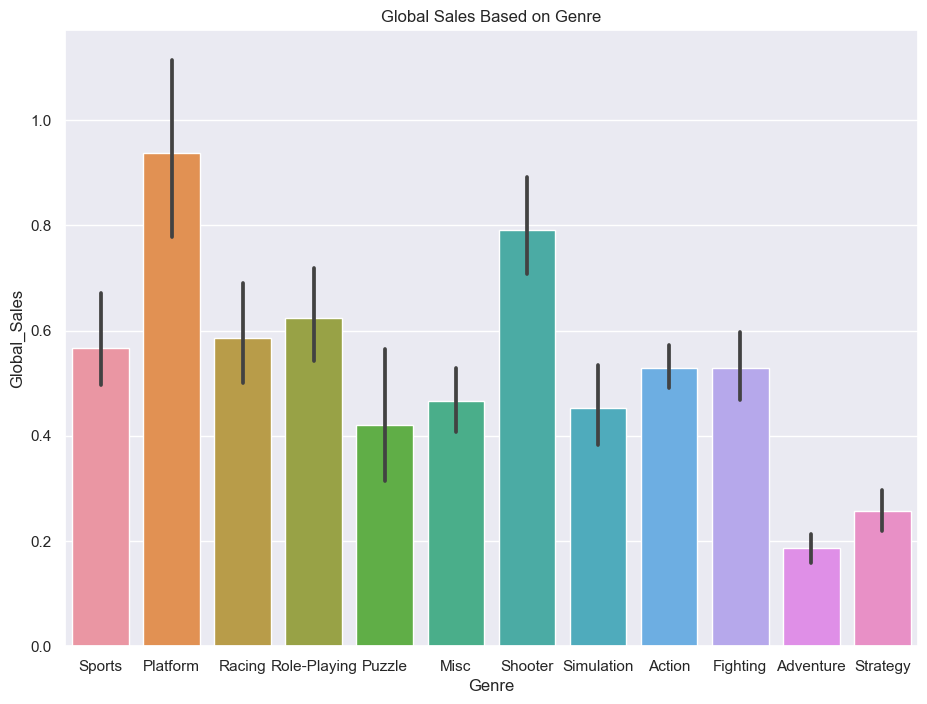

In [180]:
#We'll visualize the overall copies sold based on genre 
sb.set(rc={'figure.figsize':(11,8)})
sb.barplot(data=vidgame_df,x='Genre',y='Global_Sales').set(title='Global Sales Based on Genre')

### Findings For Inquiry #1: 
Above we can see that **Platform games have sold the most copies**, and our top 3 genres are **Platform**, **Shooter**, and **Role-Playing**

### Inquiry #2: 
##### Which games were most popular based on location?

In [211]:
columns = ['NA_Sales', 'EU_Sales', 'JP_Sales']
top5_df = pd.DataFrame()
for location in columns:
    print('These are the top games in ' + location[:2])
    print(vidgame_df.sort_values(by=location,ascending=False).Name.head(5))

These are the top games in NA
0           Wii Sports
1    Super Mario Bros.
9            Duck Hunt
5               Tetris
2       Mario Kart Wii
Name: Name, dtype: object
These are the top games in EU
0             Wii Sports
2         Mario Kart Wii
3      Wii Sports Resort
10            Nintendogs
16    Grand Theft Auto V
Name: Name, dtype: object
These are the top games in JP
4          Pokemon Red/Pokemon Blue
12      Pokemon Gold/Pokemon Silver
1                 Super Mario Bros.
6             New Super Mario Bros.
20    Pokemon Diamond/Pokemon Pearl
Name: Name, dtype: object


### Findings for Inquiry #2:
The most popular games based on location were:

#### NA (North America)
<ol>
    <li> <b>Wii Sports</b>
    <li> Super Mario Bros.
    <li> Duck Hunt
    <li> Tetris
    <li> Mario Kart Wii
</ol>

#### EU (Europe) 
<ol>
    <li> <b>Wii Sports</b>
    <li> Mario Kart Wii
    <li> Wii Sports Resort
    <li> Nintendogs
    <li> Grand Theft Auto V
</ol>

#### JP (Japan)
<ol>
    <li> <b>Pokemon Red/Pokemon Blue</b>
    <li> Pokemon Gold/Pokemon Silver
    <li> Super Mario Bros.
    <li> New Super Mario Bros.
    <li> Pokemon Diamond/Pokemon Pearl
</ol>

### Inquiry #3: 
##### Which publisher has been most successful?

#### First, let's see how many unique publishers we have

In [212]:
vidgame_df['Publisher'].nunique()

578

#### 578 unique publishers is quite a lot! So we'll be pulling our top 10 to plot

In [213]:
#Now let's make a DataFrame to hold the Global Sale sums based on Publisher
pub_df = pd.DataFrame()
pub_df = vidgame_df[['Publisher','Global_Sales']].copy()
pub_df = pub_df.groupby(by='Publisher').sum()
pub_df.reset_index(inplace=True)
pub_df = pub_df.sort_values(by='Global_Sales',ascending=False).head(10)

#### 10 publishers is much easier to handle! Now let's plot these values

In [214]:
pub_df

,Publisher,Global_Sales
359,Nintendo,1786.56
138,Electronic Arts,1110.32
21,Activision,727.46
456,Sony Computer Entertainment,607.50
525,Ubisoft,474.72
494,Take-Two Interactive,399.54
488,THQ,340.77
275,Konami Digital Entertainment,283.64
446,Sega,272.99
347,Namco Bandai Games,254.09


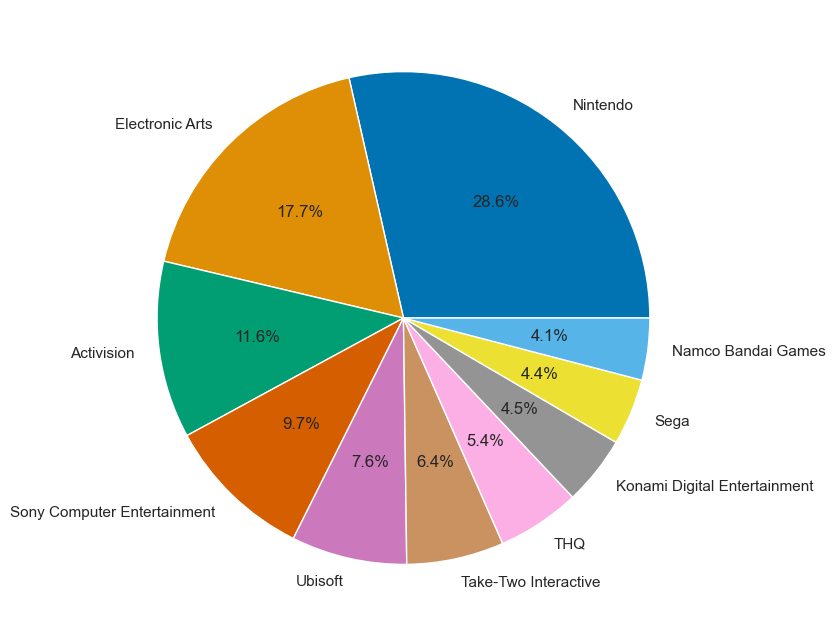

In [215]:
plt.pie(pub_df['Global_Sales'], labels=pub_df['Publisher'], 
        colors=sb.color_palette('colorblind'), autopct='%.1f%%')
plt.show()

### Findings for Inquiry #3:
Above we see that the **most successful publisher is Nintendo** with an incredible **28.6%** share of Global Sales. <br>This is nearly as much as **2nd (Electronic Arts)** and **3rd (Activision)** place combined!

### Inquiry #4: 
##### How did the top platforms perform compared to one another over time?

#### Again, let's first see how many different platforms we have in our dataset

In [216]:
vidgame_df['Platform'].nunique()

31

#### 31 different platforms! We'll tone this down to the top 4 platforms, so that our visualization can give us a clear picture.

In [217]:
#Now let's make a DataFrame to hold the Global Sale sums based on Publisher
platfilter_df = pd.DataFrame()
platfilter_df = vidgame_df[['Platform','Global_Sales']].copy()
platfilter_df = platfilter_df.groupby(by='Platform').sum()
platfilter_df.reset_index(inplace=True)
platfilter_df = platfilter_df.sort_values(by='Global_Sales',ascending=False).head(4)

In [218]:
#This is our list of top 4 platforms
platfilter_df

,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71


In [219]:
top_platforms = ['PS2','X360','PS3','Wii']
platform_df = pd.DataFrame()
platform_df = vidgame_df[['Platform','Year','Global_Sales']]
platform_df = platform_df.loc[(platform_df['Platform'].isin(top_platforms))]
platform_df

,Platform,Year,Global_Sales
0,Wii,2006.0,82.74
2,Wii,2008.0,35.82
3,Wii,2009.0,33.00
7,Wii,2006.0,29.02
8,Wii,2009.0,28.62
...,...,...,...
16573,Wii,2007.0,0.01
16574,Wii,2008.0,0.01
16580,PS2,2008.0,0.01
16581,Wii,2011.0,0.01


#### Now that our data is filtered by our top performing platforms, we can group our values by Year and Platform to get a total sum by year value

[Text(0.5, 1.0, 'Global Sales From 2000 to 2016 Based on Platform')]

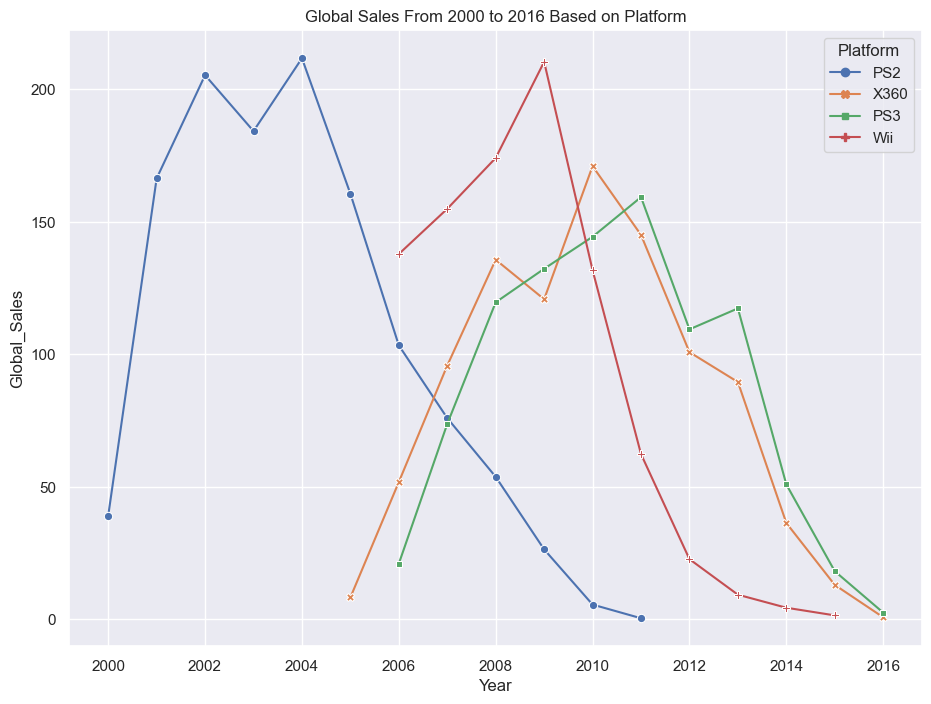

In [220]:
platform_df = platform_df.groupby(['Year','Platform'])['Global_Sales'].sum()
platform_df = platform_df.reset_index()
sb.lineplot(data=platform_df, x='Year',y='Global_Sales', hue='Platform', 
            style='Platform', markers=True, dashes=False).set(title='Global Sales From 2000 to 2016 Based on Platform')

### Findings for Inquiry #4: 
Above we can see that the **largest spikes in sales** were seen by the **PS2 in 2002 & 2004** and by the **Wii in 2009**, with both platforms seeing **Global Sales of over 200 million in those years.** The **PS2 sales dropped sharply** after the 2004 peak, **as the PS3 had been released in 2006** leading to a transition in demand. The **release of the PS3 and the X360 also drove the Wii's sales downward** as they began to dominate the market share. All of these systems would begin to see decline in 2012-2014 as the next wave of new generation consoles released.

# Conclusion
Together we discovered great findings in this dataset, such as, the most popular genres are **Platform, Shooter, and Role-Playing.** With **Platform being the most popular** of them all!

We learned that popularity differs based on location as we saw in our three top games based on location lists, though **Wii Sports and Super Mario Bros. seem to be fan favorites across the board!**

We also learned that **Nintendo is the most popular publisher** and has dominated in global sales, with **28.6% of the Global Sales** belonging to them.

Finally, we learned which platforms were the most popular and got more insight into their success over-time. With the **PS2 in 2002 & 2004** and the **Wii in 2009** having **over 200 million Global Sales.**

All of these insights together can allow for companies to attain a greater understanding of their market, and to make more informed decisions based on the actual trends!